tf_bicuad_sos: 
[[-1.          1.41421356 -1.          1.          1.41421356  1.        ]]


C:\Users\Mati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pytc2\sistemas_lineales.py:2669: RuntimeWarning: invalid value encountered in sqrt
  omega = np.sqrt(this_quad_poly[2])


<IPython.core.display.Math object>

[[1,
  array([<Axes: title={'center': 'Respuesta de Magnitud'}, ylabel='Magnitud [dB]'>,
         <Axes: title={'center': 'Respuesta de Fase'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Fase [rad]'>],
        dtype=object)],
 [2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>],
 ['none', []],
 [3,
  <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>]]

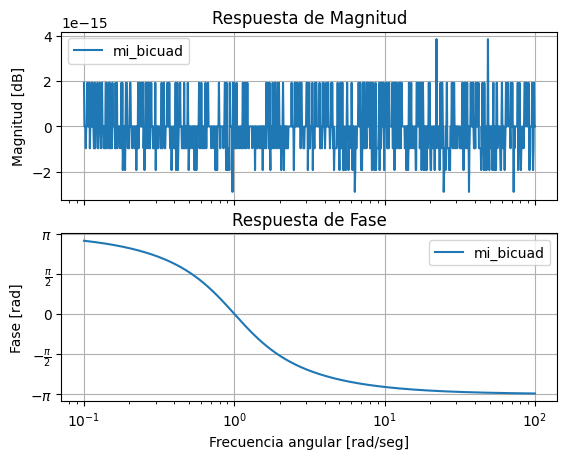

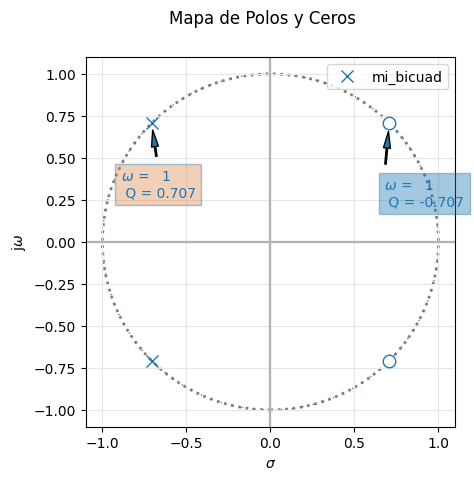

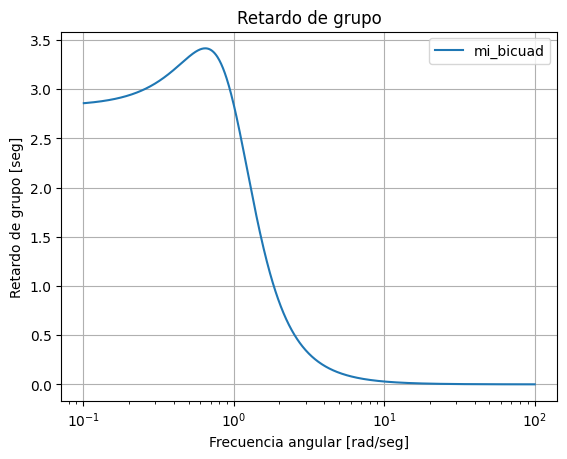

In [27]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May  8 23:14:49 2019

@author: mariano
"""

import matplotlib.pyplot as plt
import numpy as np
#from pytc2.sistemas_lineales import analyze_sys, pretty_print_SOS, zpk2sos_analog
from pytc2.sistemas_lineales import tf2sos_analog, analyze_sys, pretty_print_SOS
import scipy.signal as sig
#from scipy.signal import tf2zpk, TransferFunction, zpk2tf



# num
qn = -np.sqrt(2)/2
wn = 1
# den
qp = np.sqrt(2)/2
wp = 1

# kn = 1/wn**2 
# kp = 1/wp**2 

kn = -1 
kp = 1 

# coeficientes
num = kn * np.array([1, wn/qn, 1])
# # Omega y Q
#num = kn * np.array([1, wn/qn, wn**2]) 

den = kp * np.array([1, wp/qp, 1])
# Omega y Q
#den = kp * np.array([1, wp/qp, wp**2])

# tf_bicuad_sos = np.hstack((num,den)).reshape((1,6))
tf_bicuad_sos = tf2sos_analog( num, den )
print("tf_bicuad_sos: ")
print(tf_bicuad_sos)


# pretty_print_SOS(tf_bicuad_sos, mode='omegayq')
pretty_print_SOS(tf_bicuad_sos, mode='omegayq')
 
#plt.close('all')

# analyze_sys(tf_bicuad_sos, 'mi_bicuad', same_figs=False)
analyze_sys([sig.TransferFunction(num,den)], 'mi_bicuad', same_figs=False)

# para editar la vista de la figura
# 
# aa = plt.gcf()
# bb = aa.get_axes()
# plt.sca(bb[0])
# plt.ylim([-40, 1])
# bb[0].get_legend().remove()
# bb[0].set_xlabel('Angular frequency [rad/sec]')
# bb[0].get_xticks()